In [12]:
#  Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [13]:
weight=0.6
bias=0.3

X=torch.arange(1,9,0.05).unsqueeze(dim=1)
Y=torch.sin(X)*weight+bias

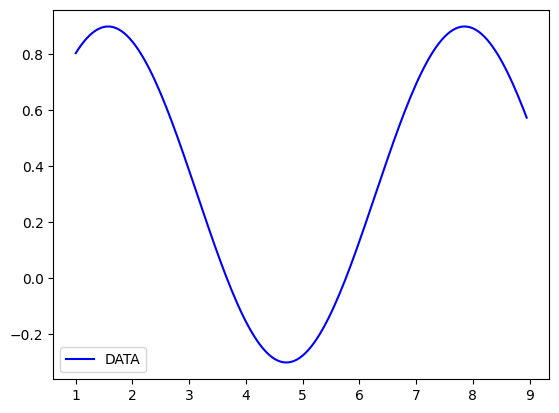

In [14]:
plt.plot(X,Y,c='b',label='DATA')
plt.legend();

(<matplotlib.legend.Legend at 0x7f76ee1ab3d0>,)

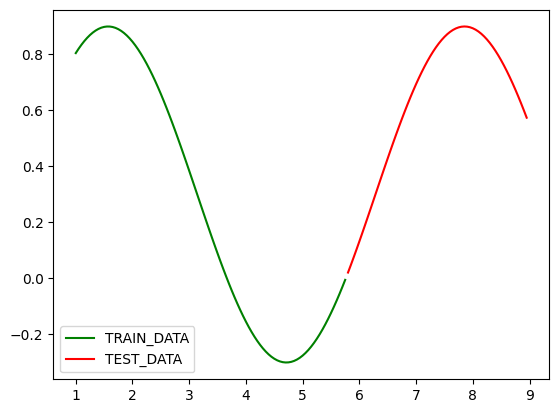

In [15]:
"""  Now Split This DATA in ratio 8:2  as Train : Test """

split=int(0.6*len(X))
train_X,train_Y,test_X,test_Y=X[:split],Y[:split],X[split:],Y[split:]

plt.plot(train_X,train_Y,c='g',label='TRAIN_DATA')
plt.plot(test_X,test_Y,c='r',label='TEST_DATA')
plt.legend(),

In [16]:
"""  Create a Model class and build an Instance """

class my_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(1,dtype=torch.float,requires_grad=True))
        self.bias=nn.Parameter(torch.rand(1,dtype=torch.float,requires_grad=True))


    def forward(self,X):
        y_pred=self.weight*torch.sin(X)+self.bias
        return y_pred


In [17]:
""" Check Model's Parameters and its Directory """
torch.manual_seed(6)
ravi_model=my_model()
ravi_model.state_dict()


OrderedDict([('weight', tensor([0.5722])), ('bias', tensor([0.5539]))])

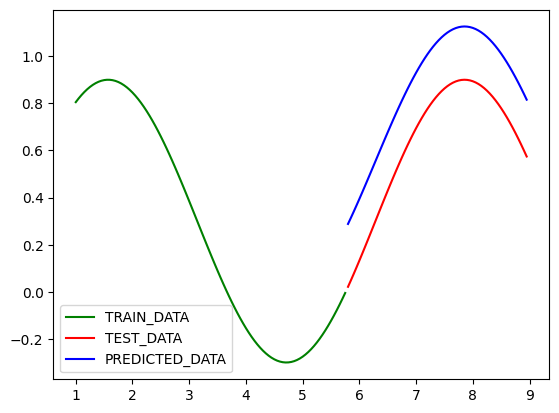

In [18]:
"""  Predict Values through Model """

with torch.inference_mode():
  y_pred_test_untrain=ravi_model(test_X)



plt.plot(train_X,train_Y,c='g',label='TRAIN_DATA')
plt.plot(test_X,test_Y,c='r',label='TEST_DATA')
plt.plot(test_X,y_pred_test_untrain,c='b',label='PREDICTED_DATA')
plt.legend();

In [19]:
"""   Build some Loss function and optimizer """

loss_func=nn.L1Loss()
SGD=torch.optim.SGD(params=ravi_model.parameters(),lr=0.001)



In [20]:
"""   TRAIN Model ,TEST Model  , PREDICTIONS  """

#  TRAIN MODE
epoch_count=[]
test_loss_count=[]
train_loss_count=[]
print("Enter EPOCHs in Thousands")
epoch=int(input())

for epoch in range(epoch):
  ravi_model.train()
  y_pred_train=ravi_model(train_X)
  train_loss=loss_func(y_pred_train,train_Y)
  SGD.zero_grad()
  train_loss.backward()
  SGD.step()

#  TEST MODE

  ravi_model.eval()

  with torch.inference_mode():
    y_pred_test=ravi_model(test_X)
    test_loss=loss_func(y_pred_test,test_Y)

    epoch_count.append(epoch)
    train_loss_count.append(train_loss.detach().numpy())
    test_loss_count.append(test_loss.detach().numpy())

    if epoch%100==0:
      print(f"EPOCH={epoch}  ||  TRAIN LOSS={train_loss}  ||  TEST LOSS={test_loss}")



Enter EPOCHs in Thousands
30
EPOCH=0  ||  TRAIN LOSS=0.2556855082511902  ||  TEST LOSS=0.2374955117702484


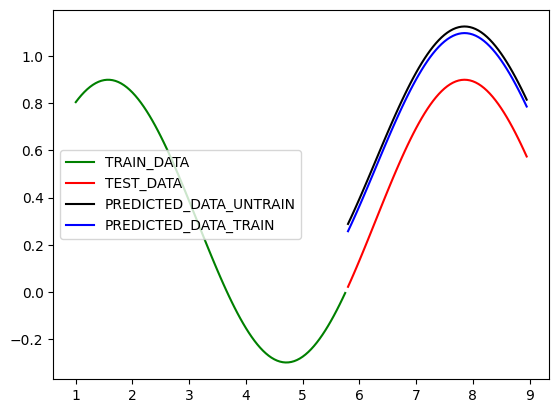

In [21]:
#  Plotting Curves

plt.plot(train_X,train_Y,c='g',label='TRAIN_DATA')
plt.plot(test_X,test_Y,c='r',label='TEST_DATA')
plt.plot(test_X,y_pred_test_untrain,c='black',label='PREDICTED_DATA_UNTRAIN')
plt.plot(test_X,y_pred_test,c='b',label='PREDICTED_DATA_TRAIN')
plt.legend();

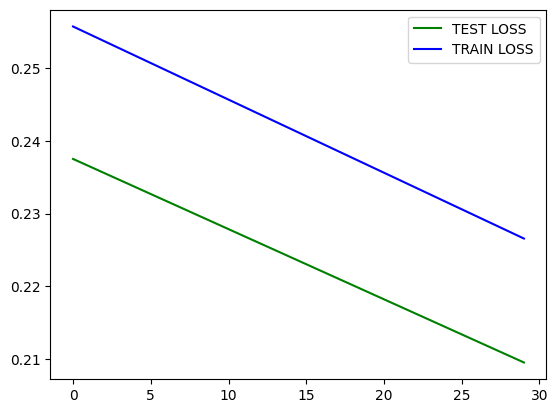

In [22]:
# Plotting Losses Curves

plt.plot(epoch_count,test_loss_count,c='g',label='TEST LOSS')
plt.plot(epoch_count,train_loss_count,c='b',label='TRAIN LOSS')
plt.legend();